## 0️⃣ Read data

### Mount from GCP

In [1]:
# Read from GCP
from google.colab import auth
auth.authenticate_user()

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!gsutil ls gs://mmfood/mmfood100k/v1/

gs://mmfood/mmfood100k/v1/candidates.csv
gs://mmfood/mmfood100k/v1/labels.csv
gs://mmfood/mmfood100k/v1/images/


In [ ]:
# Mount the bucket, copy it to local Colab
!mkdir -p /content/data
!gsutil -m cp -r gs://mmfood/mmfood100k/v1/* /content/data

Copying gs://mmfood/mmfood100k/v1/candidates.csv...
Copying gs://mmfood/mmfood100k/v1/labels.csv...
Copying gs://mmfood/mmfood100k/v1/images/apple/000003.jpg...
Copying gs://mmfood/mmfood100k/v1/images/apple/000007.jpg...
Copying gs://mmfood/mmfood100k/v1/images/apple/000004.jpg...
Copying gs://mmfood/mmfood100k/v1/images/apple/000000.jpg...
Copying gs://mmfood/mmfood100k/v1/images/apple/000002.jpg...
Copying gs://mmfood/mmfood100k/v1/images/apple/000001.jpg...
Copying gs://mmfood/mmfood100k/v1/images/apple/000006.jpg...
Copying gs://mmfood/mmfood100k/v1/images/apple/000005.jpg...
Copying gs://mmfood/mmfood100k/v1/images/apple/000008.jpg...
Copying gs://mmfood/mmfood100k/v1/images/apple/000009.jpg...
Copying gs://mmfood/mmfood100k/v1/images/apple/000010.jpg...
Copying gs://mmfood/mmfood100k/v1/images/apple/000011.jpg...
Copying gs://mmfood/mmfood100k/v1/images/apple/000012.jpg...
Copying gs://mmfood/mmfood100k/v1/images/apple/000013.jpg...
Copying gs://mmfood/mmfood100k/v1/images/apple

In [ ]:
cd data/images
ll

SyntaxError: invalid syntax (ipython-input-1509414646.py, line 1)

### Mount from Google Drive

In [2]:
# Read from Google Drive
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(os.getcwd())

/content


In [ ]:
os.listdir()

['.config',
 'val_split.csv',
 'drive',
 'test_split.csv',
 'train_split.csv',
 'sample_data']

In [ ]:
os.listdir('/content/drive/MyDrive')

['demo',
 'Colab Notebooks',
 'clean_data.ipynb',
 'food_model.keras',
 'food_model_v2.keras']

In [102]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/demo/df_clean.csv")
print(df.head())

                                           image_url dish_name  portion_size  \
0  https://file.b18a.io/7842239902600102476_96554...     apple         150.0   
1  https://file.b18a.io/7842975939000106232_73623...     apple         182.0   
2  https://file.b18a.io/7833433917600105020_59970...     apple         182.0   
3  https://file.b18a.io/7839652200100107619_42469...     apple         182.0   
4  https://file.b18a.io/7840624487800104635_56698...     apple         150.0   

   fat_g  protein_g  calories_kcal  carbohydrate_g  
0    0.2        0.3             52            14.0  
1    0.3        0.5             95            25.0  
2    0.3        0.5             95            25.0  
3    0.3        0.5             95            25.0  
4    0.2        0.3             52            14.0  


## 0️⃣ Download images to Google Drive

In [ ]:
# Creat local directories
base_dir = "/content/drive/MyDrive/food_dataset"
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(base_dir, split), exist_ok=True)

In [ ]:
# Download（Keep the original file name）
import requests
from urllib.parse import urlparse

def download_images(df, split_name):
    save_dir = os.path.join(base_dir, split_name)

    for idx, row in df.iterrows():
        url = row["image_url"]

        # Retrieve the original filename
        filename = os.path.basename(urlparse(url).path)
        save_path = os.path.join(save_dir, filename)

        # Skip if it already exists.
        if os.path.exists(save_path):
            continue

        try:
            response = requests.get(url, timeout=10)
            if response.status_code == 200:
                with open(save_path, "wb") as f:
                    f.write(response.content)
            else:
                print("Download failed:", url)

        except Exception as e:
            print("Error:", url)

In [ ]:
# Download separately
download_images(train_df, "train")

In [ ]:
download_images(val_df, "val")

In [ ]:
download_images(test_df, "test")

In [ ]:
# Add a local path column to df
def add_local_path(df, split_name):
    df = df.copy()
    df["filename"] = df["image_url"].apply(
        lambda x: os.path.basename(urlparse(x).path)
    )
    df["local_path"] = df["filename"].apply(
        lambda x: os.path.join(base_dir, split_name, x)
    )
    return df

train_df = add_local_path(train_df, "train")
val_df   = add_local_path(val_df, "val")
test_df  = add_local_path(test_df, "test")

In [ ]:
print(train_df["local_path"].isna().sum())
print(val_df["local_path"].isna().sum())
print(test_df["local_path"].isna().sum())


0
0
0


In [ ]:
val_df.head(3)

,image_url,dish_name,portion_size,fat_g,protein_g,calories_kcal,carbohydrate_g,filename,local_path
0,https://file.b18a.io/7932860385900102392_61562...,ramen,200.0,20.0,30.0,600,70.0,7932860385900102392_615623_.png,/content/drive/MyDrive/food_dataset/val/793286...
1,https://file.b18a.io/7833197761600100024_97144...,fried chicken,150.0,18.0,25.0,300,10.0,7833197761600100024_971441_.jpg,/content/drive/MyDrive/food_dataset/val/783319...
2,https://file.b18a.io/7840705555300103765_42365...,mapo tofu,300.0,25.0,30.0,400,20.0,7840705555300103765_423653_.jpeg,/content/drive/MyDrive/food_dataset/val/784070...


In [103]:
# Check how many images are in each split folder
base_dir = "/content/drive/MyDrive/food_dataset"

for split in ["train", "val", "test"]:
    folder = os.path.join(base_dir, split)
    files = [f for f in os.listdir(folder)
             if f.lower().endswith((".jpg", ".jpeg", ".png", ".webp"))]
    print(split, "image count:", len(files))

train image count: 1370
val image count: 295
test image count: 296


## 1️⃣ Split

### Split using a fixed random seed

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 1️⃣ Split train and temp
train_df, temp_df = train_test_split(
    df,
    test_size=0.3,
    random_state=42,
    stratify=df["dish_name"]
)

# 2️⃣ Split temp to val and test
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    random_state=42,
    stratify=temp_df["dish_name"]
)

print(len(train_df), len(val_df), len(test_df))

1384 297 297


### save split

In [ ]:
train_df.to_csv("/content/drive/MyDrive/demo/train_local_path.csv", index=False)
val_df.to_csv("/content/drive/MyDrive/demo/val_local_path.csv", index=False)
test_df.to_csv("/content/drive/MyDrive/demo/test_local_path.csv", index=False)

### read split

In [115]:
train_df = pd.read_csv("/content/drive/MyDrive/demo/train_local_path.csv")
val_df = pd.read_csv("/content/drive/MyDrive/demo/val_local_path.csv")
test_df = pd.read_csv("/content/drive/MyDrive/demo/test_local_path.csv")

In [117]:
train_df.head(3)

,image_url,dish_name,portion_size,fat_g,protein_g,calories_kcal,carbohydrate_g,filename,local_path,label
0,https://file.b18a.io/7837526223900109630_96487...,egg tart,100.0,10.0,4.0,200,25.0,7837526223900109630_964877_.png,/content/drive/MyDrive/food_dataset/train/7837...,2
1,https://file.b18a.io/7837724021300103588_85460...,hamburger,150.0,25.0,20.0,500,45.0,7837724021300103588_854603_.jpeg,/content/drive/MyDrive/food_dataset/train/7837...,5
2,https://file.b18a.io/7833356928200102590_93435...,egg tart,100.0,15.0,5.0,250,30.0,7833356928200102590_934357_.jpg,/content/drive/MyDrive/food_dataset/train/7833...,2


### Convert WebP to JPG

In [ ]:
from PIL import Image
import os

def convert_webp_in_df(df):
    df = df.copy()

    for idx, row in df.iterrows():
        path = row["local_path"]

        if not os.path.exists(path):
            continue

        try:
            img = Image.open(path)

            # Determine image format
            if img.format == "WEBP":

                new_path = os.path.splitext(path)[0] + ".jpg"

                img = img.convert("RGB")
                img.save(new_path, "JPEG")
                img.close()

                os.remove(path)

                df.at[idx, "local_path"] = new_path

        except Exception as e:
            print("Error processing:", path)

    return df

In [ ]:
train_df = convert_webp_in_df(train_df)
val_df   = convert_webp_in_df(val_df)
test_df  = convert_webp_in_df(test_df)

In [ ]:
# Count how many paths do not exist.
missing_files = train_df[~train_df["local_path"].apply(os.path.exists)]

print("Number of missing files:", len(missing_files))
missing_files.head()

缺失文件数量: 14


,image_url,dish_name,portion_size,fat_g,protein_g,calories_kcal,carbohydrate_g,filename,local_path,label
14,https://file.b18a.io/7833345508500109071_77028...,mapo tofu,250.0,20.0,15.0,300,10.0,7833345508500109071_770286_.jpg,/content/drive/MyDrive/food_dataset/train/7833...,6
69,https://file.b18a.io/7837732215500105795_35452...,apple,182.0,0.3,0.5,95,25.0,7837732215500105795_354523_.jpg,/content/drive/MyDrive/food_dataset/train/7837...,0
96,https://file.b18a.io/7968693770800106514_43166...,grilled steak,300.0,40.0,50.0,600,10.0,7968693770800106514_431669_.jpg,/content/drive/MyDrive/food_dataset/train/7968...,4
134,https://file.b18a.io/7832939929600100118_52723...,fried chicken,300.0,25.0,20.0,400,30.0,7832939929600100118_527233_.jpg,/content/drive/MyDrive/food_dataset/train/7832...,3
205,https://file.b18a.io/7832988389900103567_16069...,mapo tofu,300.0,30.0,25.0,400,10.0,7832988389900103567_160695_.jpg,/content/drive/MyDrive/food_dataset/train/7832...,6


In [ ]:
# Delete non-existent lines
train_df = train_df[train_df["local_path"].apply(os.path.exists)].reset_index(drop=True)
val_df   = val_df[val_df["local_path"].apply(os.path.exists)].reset_index(drop=True)
test_df  = test_df[test_df["local_path"].apply(os.path.exists)].reset_index(drop=True)

In [ ]:
train_df.shape

(1370, 10)

## 2️⃣ Calculate the nutrition lookup table using train_df

In [ ]:
nutrition_cols = [
    "portion_size",
    "fat_g",
    "protein_g",
    "calories_kcal",
    "carbohydrate_g"
]

train_nutrition_lookup = (
    train_df
    .groupby("dish_name")[nutrition_cols]
    .mean()
)

print(train_nutrition_lookup)

               portion_size      fat_g  protein_g  calories_kcal  \
dish_name                                                          
apple            175.100000   0.292857   0.485714      91.928571   
boiled eggs      172.328571  19.578571  23.732143     277.785714   
egg tart         105.000000  11.821429   4.650000     230.714286   
fried chicken    345.357143  34.678571  39.535714     556.071429   
grilled steak    265.555556  31.481481  43.333333     498.518519   
hamburger        147.286822  27.100775  27.155039     517.829457   
mapo tofu        278.928571  21.678571  20.607143     344.285714   
pizza            305.028571  20.057143  22.500000     488.892857   
ramen            201.428571  21.035714  29.607143     605.714286   
sushi            187.142857  11.360714  19.264286     352.142857   

               carbohydrate_g  
dish_name                      
apple               24.214286  
boiled eggs          1.481429  
egg tart            27.907143  
fried chicken       21.

In [ ]:
# train_nutrition_lookup.to_excel("nutrition.xlsx")
train_nutrition_lookup.to_csv("/content/drive/MyDrive/demo/nutrition.csv")


### Calculate the nutritional composition per 100g portion_size

In [ ]:
# read nutrition.csv
nutrition = pd.read_csv("/content/drive/MyDrive/demo/nutrition.csv")

In [ ]:
# Calculate scale_factor
nutrition['scale_factor'] = 100 / nutrition['portion_size']

# Nutrient columns that need to be scaled
nutrient_cols = [
    'fat_g',
    'protein_g',
    'calories_kcal',
    'carbohydrate_g'
]

# Nutritional composition per 100g of food
for col in nutrient_cols:
    nutrition[col + '_per_100g'] = nutrition[col] * nutrition['scale_factor']

In [ ]:
nutrition

,dish_name,portion_size,fat_g,protein_g,calories_kcal,carbohydrate_g,scale_factor,fat_g_per_100g,protein_g_per_100g,calories_kcal_per_100g,carbohydrate_g_per_100g
0,apple,175.100000,0.292857,0.485714,91.928571,24.214286,0.571102,0.167251,0.277393,52.500612,13.828833
1,boiled eggs,172.328571,19.578571,23.732143,277.785714,1.481429,0.580287,11.361187,13.771450,161.195391,0.859653
2,egg tart,105.000000,11.821429,4.650000,230.714286,27.907143,0.952381,11.258503,4.428571,219.727891,26.578231
3,fried chicken,345.357143,34.678571,39.535714,556.071429,21.678571,0.289555,10.041365,11.447777,161.013444,6.277146
4,grilled steak,265.555556,31.481481,43.333333,498.518519,6.555556,0.376569,11.854951,16.317992,187.726639,2.468619
5,hamburger,147.286822,27.100775,27.155039,517.829457,40.852713,0.678947,18.400000,18.436842,351.578947,27.736842
6,mapo tofu,278.928571,21.678571,20.607143,344.285714,15.821429,0.358515,7.772087,7.387964,123.431498,5.672215
7,pizza,305.028571,20.057143,22.500000,488.892857,56.492857,0.327838,6.575496,7.376358,160.277726,18.520513
8,ramen,201.428571,21.035714,29.607143,605.714286,71.892857,0.496454,10.443262,14.698582,300.709220,35.691489
9,sushi,187.142857,11.360714,19.264286,352.142857,46.500000,0.534351,6.070611,10.293893,188.167939,24.847328


In [ ]:
# save nutrition.csv
nutrition.to_csv("/content/drive/MyDrive/demo/nutrition.csv", index=False)

## 3️⃣ Training Model

### 1. Prepare label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

train_df = train_df.copy()
val_df   = val_df.copy()
test_df  = test_df.copy()

train_df["label"] = le.fit_transform(train_df["dish_name"])
val_df["label"]   = le.transform(val_df["dish_name"])
test_df["label"]  = le.transform(test_df["dish_name"])

num_classes = len(le.classes_)
print("Number of classes:", num_classes)
print(le.classes_)

Number of classes: 10
['apple' 'boiled eggs' 'egg tart' 'fried chicken' 'grilled steak'
 'hamburger' 'mapo tofu' 'pizza' 'ramen' 'sushi']


### 2. Building a tf.data Dataset

In [14]:
# Building a dataset
import tensorflow as tf
from tensorflow.keras.applications.efficientnet import preprocess_input

In [15]:
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

def load_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img.set_shape([None, None, 3])
    img = tf.image.resize(img, (224, 224))
    img = tf.cast(img, tf.float32)
    img = preprocess_input(img)
    return img, label

def make_dataset(df, training=True):
    ds = tf.data.Dataset.from_tensor_slices(
        (df["local_path"].values, df["label"].values)
    )

    ds = ds.map(load_image, num_parallel_calls=AUTOTUNE)

    if training:
        ds = ds.shuffle(1000)

    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(AUTOTUNE)

    return ds

In [119]:
# Build dataset
train_ds = make_dataset(train_df, training=True)
val_ds   = make_dataset(val_df, training=False)
test_ds  = make_dataset(test_df, training=False)

In [17]:
test_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

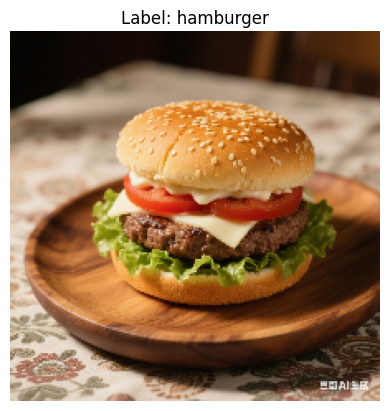

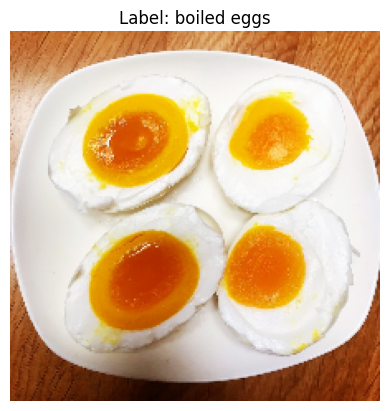

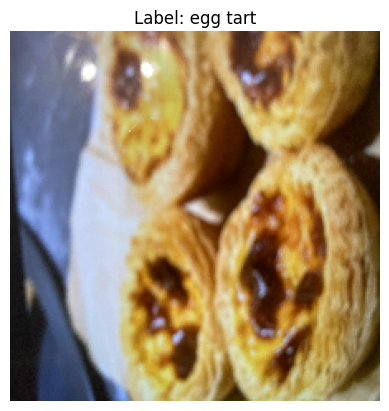

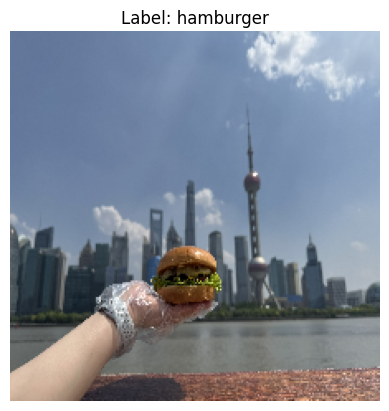

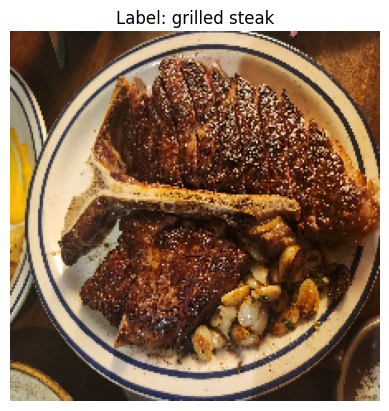

In [ ]:
# Check if the images and labels are aligned
import matplotlib.pyplot as plt

for images, labels in train_ds.take(1):
    for i in range(5):
        plt.imshow(images[i])
        plt.title("Label: " + le.inverse_transform([labels[i].numpy()])[0])
        plt.axis("off")
        plt.show()

### 3. Building the EfficientNet-B0 model

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0

In [121]:
# Loading the pre-trained backbone
base_model = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False  # Freeze in the first phase

In [122]:
# Add a category header
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])


### 4. Compile

In [123]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### 5. Training

In [124]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 308s 5s/step - accuracy: 0.4047 - loss: 1.8566 - val_accuracy: 0.8881 - val_loss: 0.6916
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 247s 4s/step - accuracy: 0.8820 - loss: 0.5741 - val_accuracy: 0.9017 - val_loss: 0.4296
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 274s 4s/step - accuracy: 0.9273 - loss: 0.3250 - val_accuracy: 0.9186 - val_loss: 0.3424
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 246s 4s/step - accuracy: 0.9505 - loss: 0.2499 - val_accuracy: 0.9288 - val_loss: 0.2982
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 298s 5s/step - accuracy: 0.9610 - loss: 0.2165 - val_accuracy: 0.9322 - val_loss: 0.2724
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 303s 5s/step - accuracy: 0.9674 - loss: 0.1680 - val_accuracy: 0.9356 - val_loss: 0.2521
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 307s 5s/step - accuracy: 0.9760 - loss: 0.1495 - val_accuracy: 0.9288 - val_loss: 0.2374
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 253s 4s/step - accuracy: 0.9737 - loss: 0.1300 - val_accuracy: 0.9356 - v

In [11]:
print(model.summary())


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

None


#### Save Model

In [125]:
# .keras format
model.save("/content/drive/MyDrive/model/food_model_mae.keras")

In [126]:
# H5 format
model.save("/content/drive/MyDrive/model/food_model_mae.h5")

#### Loading Model

In [5]:
from tensorflow import keras

In [6]:
# .keras format
model = keras.models.load_model("/content/drive/MyDrive/model/food_model_mae.keras")

In [ ]:
# H5 format
model = keras.models.load_model("/content/drive/MyDrive/model/food_model_mae.h5")

#### Save LabelEncoder

In [8]:
import pickle

In [127]:
# save
with open("/content/drive/MyDrive/model/mae_label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

In [9]:
# loading
with open("/content/drive/MyDrive/model/mae_label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

In [10]:
for i, cls in enumerate(le.classes_):
    print(i, "->", cls)

0 -> apple
1 -> boiled eggs
2 -> egg tart
3 -> fried chicken
4 -> grilled steak
5 -> hamburger
6 -> mapo tofu
7 -> pizza
8 -> ramen
9 -> sushi


### Evaluate

In [18]:
model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 5s/step - accuracy: 0.9418 - loss: 0.1999


[0.1954212635755539, 0.9425675868988037]

#### Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


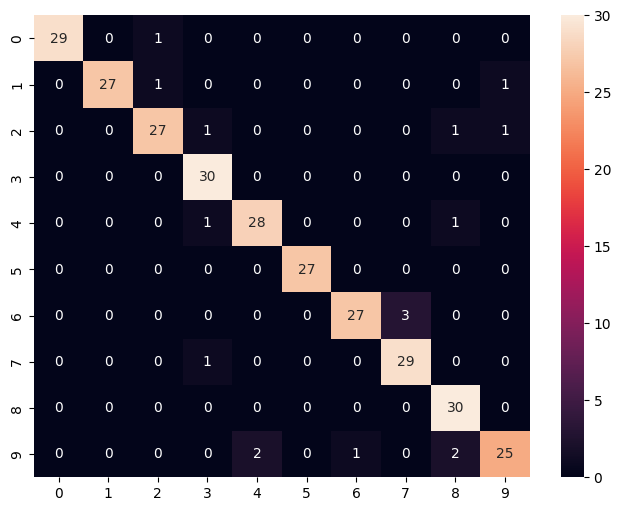

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

## 4️⃣ Calculate MAE and MAPE

### 1. Get the prediction category

In [21]:
import numpy as np

pred_probs = model.predict(test_ds)
pred_classes = np.argmax(pred_probs, axis=1)

pred_labels = le.inverse_transform(pred_classes)

10/10 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step


In [22]:
# Add back test_df
test_pred_df = test_df.reset_index(drop=True)
test_pred_df["pred_dish"] = pred_labels

In [23]:
test_pred_df.head(3)

,image_url,dish_name,portion_size,fat_g,protein_g,calories_kcal,carbohydrate_g,filename,local_path,label,pred_dish
0,https://file.b18a.io/7833097043000107585_30972...,mapo tofu,250.0,20.0,15.0,300,10.0,7833097043000107585_309722_.png,/content/drive/MyDrive/food_dataset/test/78330...,6,mapo tofu
1,https://file.b18a.io/7840449411700107323_84565...,ramen,200.0,20.0,30.0,600,70.0,7840449411700107323_845658_.jpeg,/content/drive/MyDrive/food_dataset/test/78404...,8,ramen
2,https://file.b18a.io/7836740603900108563_36917...,fried chicken,200.0,15.0,20.0,300,30.0,7836740603900108563_369179_.jpeg,/content/drive/MyDrive/food_dataset/test/78367...,3,fried chicken


### 2. Read nutrition.csv

In [24]:
nutrition_df = pd.read_csv("/content/drive/MyDrive/demo/nutrition.csv")

In [26]:
nutrition_df.drop(columns=['portion_size', 'fat_g', 'protein_g', 'calories_kcal', 'carbohydrate_g', 'scale_factor'], inplace=True)

In [29]:
nutrition_df

,dish_name,fat_g_per_100g,protein_g_per_100g,calories_kcal_per_100g,carbohydrate_g_per_100g
0,apple,0.167251,0.277393,52.500612,13.828833
1,boiled eggs,11.361187,13.771450,161.195391,0.859653
2,egg tart,11.258503,4.428571,219.727891,26.578231
3,fried chicken,10.041365,11.447777,161.013444,6.277146
4,grilled steak,11.854951,16.317992,187.726639,2.468619
5,hamburger,18.400000,18.436842,351.578947,27.736842
6,mapo tofu,7.772087,7.387964,123.431498,5.672215
7,pizza,6.575496,7.376358,160.277726,18.520513
8,ramen,10.443262,14.698582,300.709220,35.691489
9,sushi,6.070611,10.293893,188.167939,24.847328


### 3. Combined test_pred_df and nutrition_df

In [30]:
merged_df = test_pred_df.merge(
    nutrition_df,
    left_on="pred_dish",
    right_on="dish_name",
    how="left"
)

In [33]:
merged_df.head(3)

,image_url,dish_name_x,portion_size,fat_g,protein_g,calories_kcal,carbohydrate_g,filename,local_path,label,pred_dish,dish_name_y,fat_g_per_100g,protein_g_per_100g,calories_kcal_per_100g,carbohydrate_g_per_100g,pred_fat,pred_protein,pred_carb,pred_calories
0,https://file.b18a.io/7833097043000107585_30972...,mapo tofu,250.0,20.0,15.0,300,10.0,7833097043000107585_309722_.png,/content/drive/MyDrive/food_dataset/test/78330...,6,mapo tofu,mapo tofu,7.772087,7.387964,123.431498,5.672215,19.430218,18.469910,14.180538,308.578745
1,https://file.b18a.io/7840449411700107323_84565...,ramen,200.0,20.0,30.0,600,70.0,7840449411700107323_845658_.jpeg,/content/drive/MyDrive/food_dataset/test/78404...,8,ramen,ramen,10.443262,14.698582,300.709220,35.691489,20.886525,29.397163,71.382979,601.418440
2,https://file.b18a.io/7836740603900108563_36917...,fried chicken,200.0,15.0,20.0,300,30.0,7836740603900108563_369179_.jpeg,/content/drive/MyDrive/food_dataset/test/78367...,3,fried chicken,fried chicken,10.041365,11.447777,161.013444,6.277146,20.082730,22.895553,12.554292,322.026887


### 4. Calculate the nutrient value of the predicted dishes

In [32]:
merged_df["pred_fat"] = (
    merged_df["fat_g_per_100g"] *
    merged_df["portion_size"] / 100
)

merged_df["pred_protein"] = (
    merged_df["protein_g_per_100g"] *
    merged_df["portion_size"] / 100
)

merged_df["pred_carb"] = (
    merged_df["carbohydrate_g_per_100g"] *
    merged_df["portion_size"] / 100
)

merged_df["pred_calories"] = (
    merged_df["calories_kcal_per_100g"] *
    merged_df["portion_size"] / 100
)

### 5. Calculate MAE and MAPE

In [34]:
from sklearn.metrics import mean_absolute_error
import numpy as np

In [35]:
# Avoid dividing by 0
def safe_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(
        np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])
    ) * 100


In [36]:
# Fat
fat_mae = mean_absolute_error(
    merged_df["fat_g"],
    merged_df["pred_fat"]
)

fat_mape = safe_mape(
    merged_df["fat_g"],
    merged_df["pred_fat"]
)

In [37]:
# Protein
protein_mae = mean_absolute_error(
    merged_df["protein_g"],
    merged_df["pred_protein"]
)

protein_mape = safe_mape(
    merged_df["protein_g"],
    merged_df["pred_protein"]
)

In [38]:
# Carb
carb_mae = mean_absolute_error(
    merged_df["carbohydrate_g"],
    merged_df["pred_carb"]
)

carb_mape = safe_mape(
    merged_df["carbohydrate_g"],
    merged_df["pred_carb"]
)

In [39]:
# Calories
cal_mae = mean_absolute_error(
    merged_df["calories_kcal"],
    merged_df["pred_calories"]
)

cal_mape = safe_mape(
    merged_df["calories_kcal"],
    merged_df["pred_calories"]
)

In [40]:
print("Fat MAE:", fat_mae, "MAPE:", fat_mape)
print("Protein MAE:", protein_mae, "MAPE:", protein_mape)
print("Carb MAE:", carb_mae, "MAPE:", carb_mape)
print("Calories MAE:", cal_mae, "MAPE:", cal_mape)

Fat MAE: 6.471946309542821 MAPE: 52.902374093484895
Protein MAE: 7.796508595446198 MAPE: 35.066923169148566
Carb MAE: 8.290924564197491 MAPE: 75.5487204529331
Calories MAE: 111.49449558765123 MAPE: 28.452845787146437
